#Predicting studetn pass/fail using decision tree

In [1]:
#Loading dataset
import pandas as pd
import numpy as np

In [2]:
d= pd.read_csv(r"C:\Users\ADITYA\Desktop\Student Pass or Fail\student\student-por.csv", sep= ';')
d.info()
# r converts normal string to raw string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [3]:
#generating binary label for pass/fail , dropping G1,G2,G3 tosubstitue with pass/fail column
d['pass']=d.apply(lambda row:1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0,axis =1)
d=d.drop(['G1','G2','G3'], axis=1)
d.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,6,1
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,1
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,2,1
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,1
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,1


In [4]:
print(d.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'pass'],
      dtype='object')


In [5]:
print(d.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
pass           int64
dtype: object


In [6]:
#use one hot coding on categorical columns,, changing words or phrases to  numerical value
d= pd.get_dummies(d,columns =['sex','school','address','famsize','Pstatus','Mjob','Fjob','reason',
                              'guardian','schoolsup','famsup','paid','activities','nursery','higher',
                              'internet','romantic'])
d.head(10)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0


In [7]:
#shuffle rows
d=d.sample(frac=1)

#split and testing data
d_train=d[:500]            #training set
d_test=d[500:]             #testing set

d_train_attribute = d_train.drop(['pass'],axis = 1)   #removing pass column from training set
d_train_pass = d_train['pass']                        #Saving pass column of training set separately

d_test_attribute = d_test.drop(['pass'],axis = 1)        # removing pass column from testing set
d_test_pass = d_test['pass']                             # saving pass column of testing set separately

d_att = d.drop(['pass'],axis =1)                      #dropping pass column from original dataset
d_pass = d['pass']                                    #and saving separately

#number of passing students in whole dataset:
print(" Passing: %d out of %d (%.2f%%)"  % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass))/ len(d_pass)))





 Passing: 328 out of 649 (50.54%)


In [8]:
#fitting a decision tree
#entropy or information gain metric is used to decide when to split. We will split at a depth of five questions, by using max_depth=5 as 
#  an initial tree depth to get a feel for how the tree is fitting the data
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion= "entropy", max_depth=5)
t = t.fit(d_train_attribute, d_train_pass) 

In [9]:
#save tree
import graphviz
tree.export_graphviz(t,out_file= "student-performance.dot", label ="all", impurity= False , proportion =True,
                    feature_names=list(d_train_attribute), class_names=["fail","pass"],
                    filled = True, rounded= True)


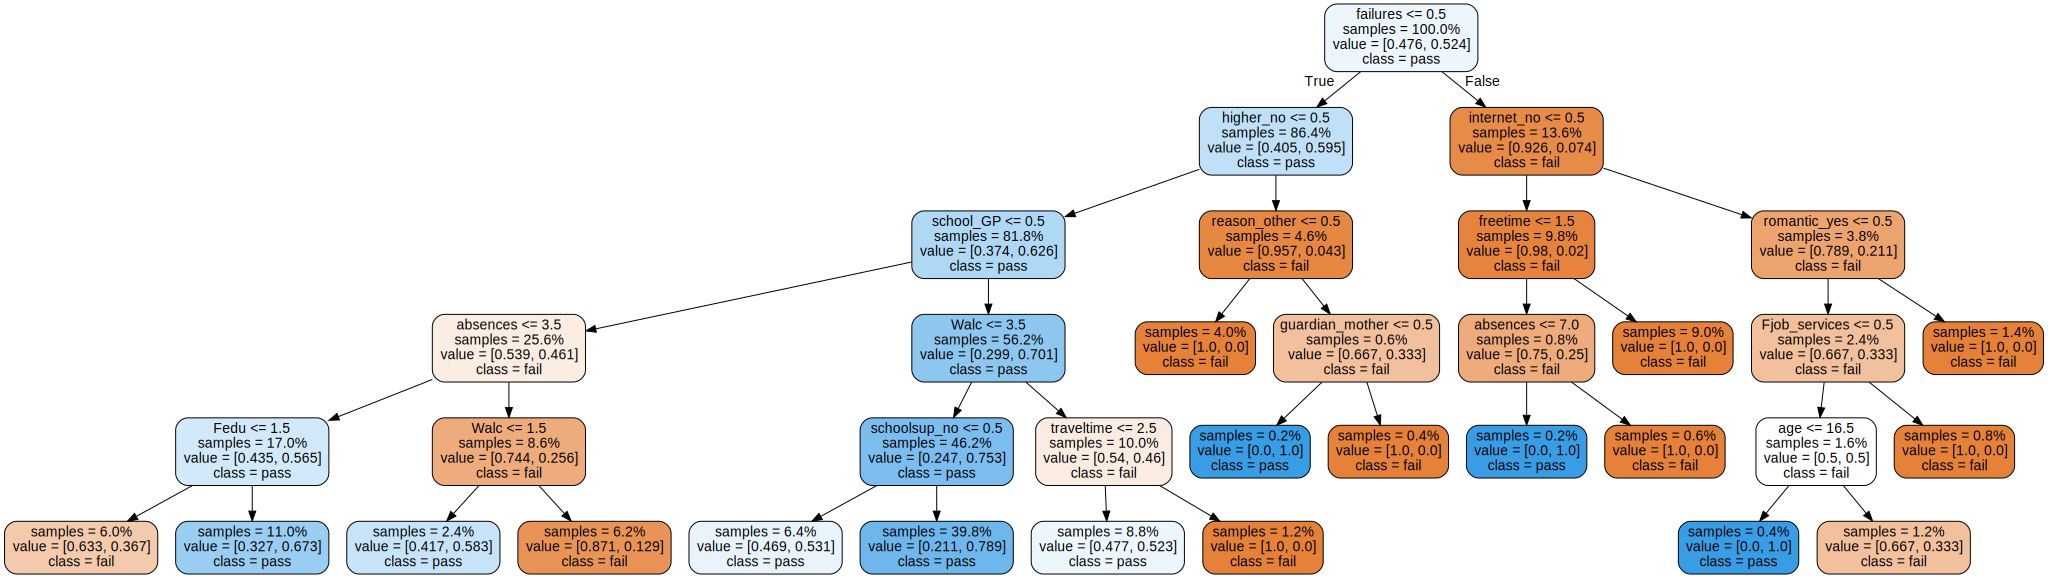

In [10]:
from IPython.display import display
with open("student-performance.dot") as f:
    dot_graph= f.read()
display(graphviz.Source(dot_graph))

In [11]:
# Now checking score on test set
t.score(d_test_attribute,d_test_pass)

0.7181208053691275

Nowadays, model_selection is used instead of cross_validation 
cross_val_score evaluate a score by cross-validation
cv: int,cross-validation generator or an iterable, default=None . Determines the cross-validation splitting strategy.(None, to use the default 5-fold cross validation means cv act same in cv= 5 or cv=None.)


In [12]:
#cross verifying if data is trained perfectly

from sklearn.model_selection import cross_val_score
scores = cross_val_score(t,d_att,d_pass,cv=5)
#show average scores and +/- two standard deviations away(covering 95% of score)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.66 (+/- 0.07)


In [13]:
# trying to create a decision tree of depth 20
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t,d_att,d_pass,cv=5)
    print("Max depth:%d, Accuracy: %0.2f(+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth:1, Accuracy: 0.62(+/- 0.08)
Max depth:2, Accuracy: 0.69(+/- 0.05)
Max depth:3, Accuracy: 0.69(+/- 0.09)
Max depth:4, Accuracy: 0.69(+/- 0.05)
Max depth:5, Accuracy: 0.66(+/- 0.06)
Max depth:6, Accuracy: 0.64(+/- 0.08)
Max depth:7, Accuracy: 0.65(+/- 0.09)
Max depth:8, Accuracy: 0.65(+/- 0.07)
Max depth:9, Accuracy: 0.63(+/- 0.13)
Max depth:10, Accuracy: 0.64(+/- 0.10)
Max depth:11, Accuracy: 0.64(+/- 0.07)
Max depth:12, Accuracy: 0.64(+/- 0.08)
Max depth:13, Accuracy: 0.63(+/- 0.09)
Max depth:14, Accuracy: 0.62(+/- 0.07)
Max depth:15, Accuracy: 0.61(+/- 0.09)
Max depth:16, Accuracy: 0.62(+/- 0.07)
Max depth:17, Accuracy: 0.62(+/- 0.08)
Max depth:18, Accuracy: 0.61(+/- 0.10)
Max depth:19, Accuracy: 0.63(+/- 0.06)


In [14]:
# np.empty function is used to return a new array of given shape and type, with random values.
# Here, matrix of 19 by 3 of float values

depth_acc = np.empty((19,3), float) 
i=0
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t,d_att,d_pass,cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i +=1
depth_acc    

array([[ 1.        ,  0.62407871,  0.0785207 ],
       [ 2.        ,  0.68725104,  0.04522171],
       [ 3.        ,  0.69036374,  0.09220183],
       [ 4.        ,  0.68573643,  0.05404868],
       [ 5.        ,  0.66264758,  0.06018072],
       [ 6.        ,  0.64725104,  0.08859662],
       [ 7.        ,  0.65342874,  0.08042271],
       [ 8.        ,  0.65340489,  0.06361   ],
       [ 9.        ,  0.63957066,  0.09454579],
       [10.        ,  0.64419797,  0.10631679],
       [11.        ,  0.63190221,  0.12376369],
       [12.        ,  0.63183065,  0.08257389],
       [13.        ,  0.63181872,  0.06401122],
       [14.        ,  0.61179487,  0.07292877],
       [15.        ,  0.60870602,  0.0748187 ],
       [16.        ,  0.63032797,  0.09224504],
       [17.        ,  0.61489565,  0.09136956],
       [18.        ,  0.61952296,  0.08124693],
       [19.        ,  0.61952296,  0.09216591]])

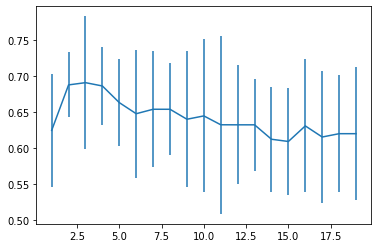

In [15]:
# graph : The error bars shown are the standard deviations in the score, which concludes that a depth of 
# 3 or 4 is ideal for this dataset, and that our assumption of 5 was incorrect

import matplotlib.pyplot as plt
fig, ax= plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr =depth_acc[:,2])
plt.show()

Thus having more depth(or no of questions) doesn't going to help , neither a single question